[[1.]
 [3.]
 [2.]]
[[2.428301 3.157924]
 [5.813503 2.633656]
 [7.119387 3.616684]]


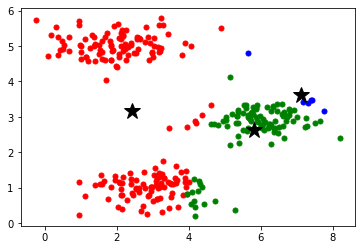

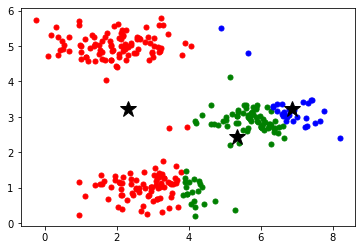

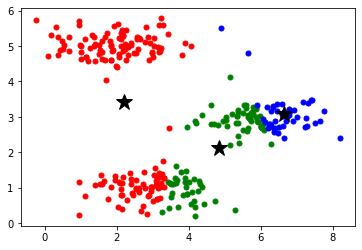

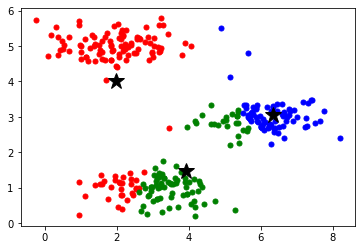

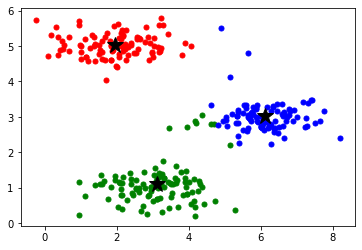

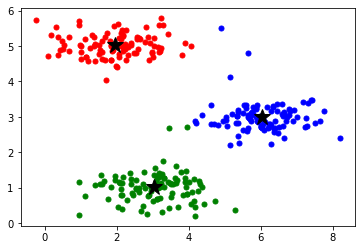

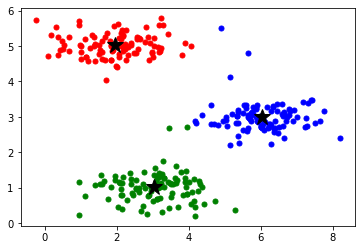

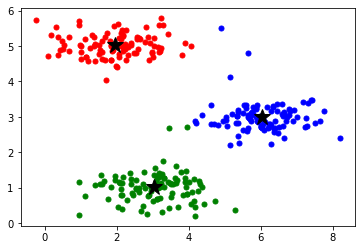

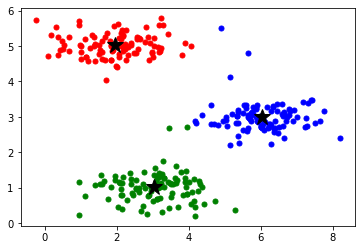

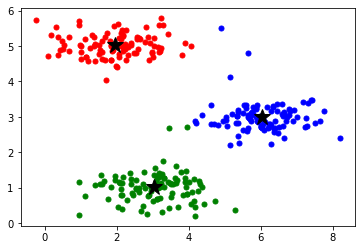

[[3.915961 1.012258]
 [2.559831 5.263978]
 [2.02359  0.447716]]


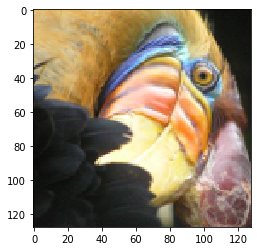

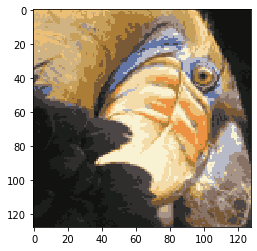

In [1]:
%matplotlib inline
import sys
from numpy import *
import scipy.misc, scipy.io, scipy.optimize, scipy.cluster.vq
from matplotlib import pyplot, cm, colors
from mpl_toolkits.mplot3d import Axes3D
import imageio

EX_DIRECTORY_PATH = './data/'

def findClosestCentroids( X, centroids ):
    K   = shape( centroids )[0]
    m   = shape( X )[0]
    idx = zeros( (m, 1) )

    for i in range(0, m):
        lowest          = 999
        lowest_index = 0

        for k in range( 0, K ):
            cost = X[i] - centroids[k]
            cost = cost.T.dot( cost )
            if cost < lowest:
                lowest_index = k
                lowest          = cost

        idx[i] = lowest_index
    return idx + 1 # add 1, since python's index starts at 0
    
def computeCentroidsLoop(X, idx, K):
    m, n = shape( X )    
    centroids = zeros((K, n))

    for k in range(1, K+1):

        counter = 0
        cum_sum = 0
        for i in range( 0, m ):
            if idx[i] == k:
                cum_sum += X[i]
                counter += 1
        centroids[k-1] = cum_sum / counter
    return centroids
        
def computeCentroids( X, idx, K ):
    m, n = shape( X )    
    centroids = zeros((K, n))

    data = c_[X, idx] # append the cluster index to the X

    for k in range( 1, K+1 ):
        temp             = data[data[:, n] == k]    # quickly extract X that falls into the cluster
        count             = shape( temp )[0]        # count number of entries for that cluster

        for j in range( 0, n ):
            centroids[k-1, j] = sum(temp[:, j]) / count

    return centroids

def runkMeans( X, initial_centroids, max_iters, plot=False ):
    K           = shape( initial_centroids )[0]
    centroids   = copy( initial_centroids )
    idx         = None

    for iteration in range( 0, max_iters ):
        idx         = findClosestCentroids( X, centroids )
        centroids   = computeCentroids( X, idx, K )
    
        if plot is True:    
            data = c_[X, idx]

            # Extract data that falls in to cluster 1, 2, and 3 respectively, and plot them out
            data_1 = data[data[:, 2] == 1]
            pyplot.plot( data_1[:, 0], data_1[:, 1], 'ro', markersize=5 )

            data_2 = data[data[:, 2] == 2]
            pyplot.plot( data_2[:, 0], data_2[:, 1], 'go', markersize=5 )

            data_3 = data[data[:, 2] == 3]
            pyplot.plot( data_3[:, 0], data_3[:, 1], 'bo', markersize=5 )

            pyplot.plot( centroids[:, 0], centroids[:, 1], 'k*', markersize=17 )

            pyplot.show( block=True )

    return centroids, idx

def kMeansInitCentroids( X, K ):
    return random.permutation( X )[:K]

def part1_1():
    mat = scipy.io.loadmat( EX_DIRECTORY_PATH + "ex7data2.mat" )
    X     = mat['X']
    K     = 3

    initial_centroids = array([[3, 3], [6, 2], [8, 5]])

    idx = findClosestCentroids( X, initial_centroids )
    print (idx[0:3]) # should be [1, 3, 2]
    
    
    centroids = computeCentroids( X, idx, K )
    print (centroids)
    # should be 
    # [[ 2.428301  3.157924]
    #  [ 5.813503  2.633656]
    #  [ 7.119387  3.616684]]


def part1_2():
    mat = scipy.io.loadmat( EX_DIRECTORY_PATH + "ex7data2.mat" )
    X     = mat['X']
    K     = 3

    max_iters = 10
    centroids = array([[3, 3], [6, 2], [8, 5]])
    
    runkMeans( X, centroids, max_iters, plot=True )



def part1_3():
    mat = scipy.io.loadmat( EX_DIRECTORY_PATH + "ex7data2.mat" )
    X     = mat['X']
    K     = 3

    max_iters = 10
    centroids = array([[3, 3], [6, 2], [8, 5]])
    print (kMeansInitCentroids( X, K )) # it's randomly one of the coordinates from X

def part1_4():
    A = imageio.imread( EX_DIRECTORY_PATH + "bird_small.png" )

    # shows the image
    axes     = pyplot.gca()
    figure     = pyplot.gcf()
    axes.imshow( A )
    pyplot.show( block=True )

    A = A / 255.0
    img_size = shape( A )

    X = A.reshape( img_size[0] * img_size[1], 3 )
    K = 16
    max_iters = 10

    initial_centroids = kMeansInitCentroids( X, K )
    centroids, idx = runkMeans( X, initial_centroids, max_iters )

    # mapping the centroids back to compressed image,
    # e.g. all pixels in that cluster shares the same color as the centroid
    m = shape( X )[0]
    X_recovered = zeros( shape(X) )

    for i in range( 0, m ):
        k                 = int(idx[i]) - 1
        X_recovered[i]     = centroids[k]

    X_recovered = X_recovered.reshape( img_size[0], img_size[1], 3 )
    axes     = pyplot.gca()
    figure     = pyplot.gcf()
    axes.imshow( X_recovered )
    pyplot.show( block=True )    


def main():
    set_printoptions(precision=6, linewidth=200)
    part1_1()
    part1_2()
    part1_3()
    part1_4()
    

if __name__ == '__main__':
    main()